# Applied Data Science Case Study - LGD Schätzung

Paul Haimerl: Paul.haimerl@stud.uni-regensburg.de (2099707), Alexander Freundl: Alexander.Freundl@stud.uni-regensburg.de (2021304), Julian Bleyer: Julian.bleyer@stud.uni-regensburg.de (2102164), Andreas Priller: Andreas.priller@stud.uni-regensburg.de (2116376), Robin Siepmann: Robin.siepmann@stud.uni-regensburg.de (2088557 ?), Jonas Kreilinger: Jonas.kreilinger@stud.uni-regensburg.de (2086675)



In [56]:
#Import notwendiger libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import math

import os 
import warnings
warnings.filterwarnings('ignore')

#Import des Panel-Datensatzes 
data_lgd = pd.read_csv('LGD_Panel.csv')

# Deskriptive Analyse 

In [57]:
#Bestimmung von Datentypen 
print(data_lgd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [58]:
#Darstellen der Features mit NaN in Trainings- und Testset  
print('columns with null values:\n', data_lgd.isnull().sum())
print('-'*33)


columns with null values:
 id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   61018
balance_time                   0
LTV_time                      25
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time              350
hpi_orig_time                  0
default_time                   0
payoff_time                    0
status_time                    0
lgd_time                   60653
recovery_res               60653
dtype: int64
---------------------------------


In [59]:
#Überblick über wichtige Kennzahlen des Trainings- und Testsets
data_lgd.describe()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
count,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1160.000000,6.217800e+04,62153.000000,62178.000000,62178.000000,...,6.217800e+04,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1525.000000,1.525000e+03
mean,25371.293528,35.877979,20.688218,24.649185,137.722651,40.711207,2.448294e+05,83.320156,6.663767,4.516695,...,2.545839e+05,673.357200,78.702839,5.600969,198.501593,0.024526,0.042218,0.108961,0.495982,1.324083e+05
std,13737.375198,11.652381,7.377185,6.838495,19.016813,9.276421,2.089384e+05,28.106665,2.100772,0.513379,...,2.115463e+05,72.100064,10.243045,2.985547,33.758503,0.154678,0.201087,0.426060,0.381771,1.501463e+05
min,4.000000,1.000000,-40.000000,1.000000,18.000000,7.000000,0.000000e+00,0.000000,0.000000,1.650000,...,0.000000e+00,429.000000,50.100000,0.000000,75.730000,0.000000,0.000000,0.000000,0.000000,-1.909486e+05
25%,13711.250000,28.000000,18.000000,21.000000,137.000000,35.000000,1.008911e+05,67.056456,5.625000,4.240000,...,1.075000e+05,628.000000,75.000000,4.875000,186.910000,0.000000,0.000000,0.000000,0.104600,3.644842e+04
50%,25572.000000,34.000000,22.000000,25.000000,142.000000,40.000000,1.809344e+05,82.256173,6.625000,4.600000,...,1.880000e+05,675.000000,80.000000,6.250000,216.770000,0.000000,0.000000,0.000000,0.514654,8.948393e+04
75%,37326.000000,44.000000,25.000000,28.000000,145.000000,47.000000,3.337000e+05,100.766023,7.820000,4.710000,...,3.500000e+05,730.000000,80.000000,7.388000,223.750000,0.000000,0.000000,0.000000,0.768253,1.832579e+05
max,49972.000000,60.000000,60.000000,60.000000,229.000000,60.000000,3.106990e+06,803.513550,37.500000,8.650000,...,3.107000e+06,819.000000,119.800000,15.000000,226.290000,1.000000,1.000000,2.000000,2.022767,1.518109e+06


Die deskriptiven Statistiken lassen keine unrealistischen Ausreißer erkennen

Da die LGD geschätzt wird, werden nur die Beobachtungen betrachtet, welche einen abgeschlossenen Ausfall darstellen.
Ein abgeschlossener Ausfall wird durch das Vorhandensein der Variable res_time definiert.
res_time: Gibt den Zeitpunkt der Erklärung des Ausfalls an und beträgt für nicht beendete Ausfälle und für Nicht-Ausfälle NaN.  

In [60]:
#Beschränken des Datensets auf Schuldner, deren Kredit ausgefallen ist
data_lgd = data_lgd[data_lgd['default_time'] == 1]
data_lgd_new = data_lgd.dropna(subset = ['res_time'])
data_lgd_new.head()


,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
263,191,31,23,26,143,38.0,223884.74,87.176730,7.360,4.39,...,630,80.0,7.360,FL,221.91,1,0,1,0.883919,25988.76
356,330,33,27,28,147,43.0,144374.85,98.272701,9.045,4.71,...,613,80.0,9.045,FL,222.39,1,0,1,1.236213,-34103.22
360,331,31,26,28,147,60.0,285484.83,89.452618,10.620,4.64,...,605,80.0,10.620,FL,225.10,1,0,1,0.706870,83684.11
372,343,42,27,32,148,44.0,79140.44,121.463371,8.870,4.71,...,633,90.0,8.870,MD,222.39,1,0,1,1.077359,-6122.26
420,385,39,28,32,88,41.0,150074.42,122.611681,9.820,4.65,...,584,95.0,9.820,TX,219.67,1,0,1,0.351805,97277.45


In [61]:
#Anzahl der null values nach erster Beschränkung des Datensets
print(data_lgd_new.isnull().sum())
print('-'*33)
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            5
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
---------------------------------
(1160, 28)


Die oben zu erkennenden Missing-values der Variable state_orig_time werden im Folgenden entfernt. Aufgrund der geringen Anzahl (5) an Missing-values ist eine extra Kategorisierung nicht sinnvoll. 

In [62]:
#Entfernen der NaN in 'state_orig_time'
data_lgd_new = data_lgd_new.dropna(subset = ['state_orig_time'])

print(data_lgd_new.isnull().sum())
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
(1155, 28)


Auf Basis der bereits bestehenden Features werden neue Erklärvariablen konstruiert. Dabei erstellen wir:
-res_duration: Dauer bis zur Klärung des Ausfalls 
-planned_lifetime: Geplante Laufzeit des Kredits 
-realized_lifetime: Laufzeit des Kredits bis zum Ausfall
-rel_realized_lifetime: Verhältnis realized_lifetime zur planned_lifetime
-remaining_lifetime: Ausstehende Laufzeit bis zum vertraglichen Ende der Laufzeit bei Ausfall
-diff_LTV: differenz der LTV zum Zeitpunkt t zu LTV_orig_time
-rel_diff_LTV: Anteil der LTV zum Zeitpunkt t von LTV_orig_time
-diff_hpi: differenz der HPI zum Zeitpunkt t zu LTV_orig_time
-rel_diff_hpi: Anteil der LTV zum Zeitpunkt t von LTV_orig_time
-diff_interest_rate: differenz des Zinssatzes zum Zeitpunkt t zu interest_rate_orig_time
-rel_diff_interest_rate: Anteil des Zinssatzes zum Zeitpunkt t von interest_rate_orig_time

In [63]:
#Entwickeln neuer Features
data_lgd_new.loc[:, "res_duration"] = data_lgd_new.loc[:, "res_time"] - data_lgd_new.loc[:, 'time']
data_lgd_new.loc[:, "planned_lifetime"] = data_lgd_new.loc[:, "mat_time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "realized_lifetime"] = data_lgd_new.loc[:, "time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "rel_realized_lifetime"] = data_lgd_new.loc[:, "realized_lifetime"] / data_lgd_new.loc[:, "planned_lifetime"]
data_lgd_new.loc[:, "remaining_lifetime"] = data_lgd_new.loc[:, "planned_lifetime"] - data_lgd_new.loc[:, "realized_lifetime"]
data_lgd_new.loc[:, "diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] - data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "rel_diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] / data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] - data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "rel_diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] / data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] - data_lgd_new.loc[:, "Interest_Rate_orig_time"]
data_lgd_new.loc[:, "rel_diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] / data_lgd_new.loc[:, "Interest_Rate_orig_time"]

Da es sich bei state_orig_time um eine kategoriale Variable handelt, wird diese als Dummy codiert.

In [64]:
state_dummies = pd.get_dummies(data_lgd_new['state_orig_time'])
data_lgd_new = pd.concat([data_lgd_new, state_dummies], axis = 1)

In [65]:
#Ausfälle pro Staat
defaults_state = data_lgd_new['state_orig_time'].value_counts()
print(defaults_state)

CA    281
FL    158
AZ     54
TX     52
NV     50
GA     49
MI     41
IL     39
OH     37
WA     30
VA     27
MD     26
MN     25
CO     23
MO     23
NY     19
NC     17
MA     16
NJ     16
IN     16
OR     16
TN     16
SC     11
LA     10
AL      9
PA      9
CT      8
UT      8
ME      7
OK      7
WI      6
MS      6
IA      5
HI      4
KY      4
ID      3
NH      3
DC      3
NM      3
KS      3
DE      3
NE      2
WV      2
AR      2
AK      1
RI      1
WY      1
MT      1
SD      1
PR      1
Name: state_orig_time, dtype: int64


Aufgrund der geringen Ausssagekraft werden Staaten mit einer Ausfallzahl <= 5 aus dem Datensatz entfernt. Somit wird Schätzvarianz verringert ohne den Erklärwert des Modells erheblich zu beeinflussen.

In [66]:
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AK']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['RI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['PR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['MT']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['SD']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WV']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KS']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['ID']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NH']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DC']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NM']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['HI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['IA']==1].index, inplace=True)


In [67]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AK']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'RI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'PR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'MT']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'SD']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NM']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KS']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'ID']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DC']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NH']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'HI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'IA']
data_lgd_new.shape

(1112, 71)

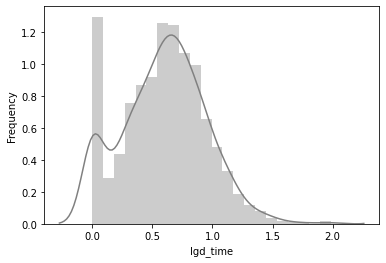

In [68]:
sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()

Der Plot zeigt die Verteilung der Outcome-variable an. Zu erkennen ist eine Häufung von sehr kleinen LGDs, die nicht der allgemeinen LGD-verteilung folgen. Des Weiteren ist eine geringe Anzahl von überdurchschnittlich großen LGDs zu beobachten. Um die Güte des Modells zu erhöhen werden alle LGD-realisationen über 1 gewinsorized. Um später eventuell den Log auf das Outcome anzuwenden, werden LGD realisationen auf 0,001 gefloored.

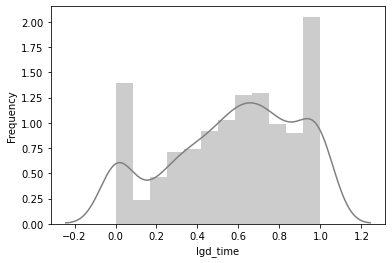

count    1112.00
mean        0.57
std         0.31
min         0.00
25%         0.36
50%         0.61
75%         0.83
max         1.00
Name: lgd_time, dtype: float64

In [69]:
#Winsorizen der lgd_time um realisationen zwischen 1 und 0 zu erhalten
data_lgd_new.loc[data_lgd_new['lgd_time'] >= 1, 'lgd_time'] = 1
data_lgd_new.loc[data_lgd_new['lgd_time'] <= 0, 'lgd_time'] = 0.0001



sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()



data_lgd_new.lgd_time.describe().round(decimals = 2)


In [70]:
#Korrelation der Features mit lgd_time
#print('-'*35)
print(data_lgd_new.corr()['lgd_time'])

id            0.083820
time          0.156099
orig_time     0.299910
first_time    0.297983
mat_time      0.137891
                ...   
TX           -0.065927
UT           -0.076041
VA           -0.077782
WA           -0.126606
WI            0.014235
Name: lgd_time, Length: 70, dtype: float64


Die Tabelle gibt die univariaten Korrelationen der Features zur lgd_time aus. Features mit Korrelationen von ]-0,1 ; 0,1[   werden entfernt.
Dadurch reduziert sich die Anzahl der Features von 70 auf 51.

In [113]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'id']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rate_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'hpi_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'uer_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_CO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_PU_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_SF_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'default_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'payoff_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'status_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'state_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'recovery_res']                                

In [115]:
data_lgd_new.describe()

,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,gdp_time,investor_orig_time,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WI
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1.112000e+03,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,34.157374,22.723921,25.640288,142.566547,40.810252,2.437148e+05,96.817392,7.715757,0.462568,0.154676,...,0.006295,0.014388,0.008094,0.009892,0.014388,0.046763,0.007194,0.024281,0.026978,0.005396
std,7.945441,6.049321,5.120872,13.281386,9.210556,1.673495e+05,21.075637,1.962222,2.330932,0.361758,...,0.079126,0.119140,0.089640,0.099010,0.119140,0.211225,0.084551,0.153988,0.162093,0.073290
min,3.000000,-21.000000,1.000000,40.000000,9.000000,1.256519e+04,19.565958,2.000000,-4.146711,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,21.000000,24.000000,141.000000,35.000000,1.198230e+05,82.968773,6.625000,-0.314448,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,25.000000,27.000000,144.000000,40.000000,2.012474e+05,98.521344,7.700000,1.229172,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,26.000000,29.000000,147.000000,47.000000,3.235963e+05,112.143608,8.900000,2.229868,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.000000,31.000000,52.000000,189.000000,60.000000,1.317836e+06,155.613265,13.500000,4.320114,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Die folgenden Grafiken zeigen Plots der inkludierten Features gegenüber der lgd_time an. Generell ist für die Features kein starker Zusammenhang grafisch erkennbar. Zudem ist kein Ausreißer in den Plots erkennbar.

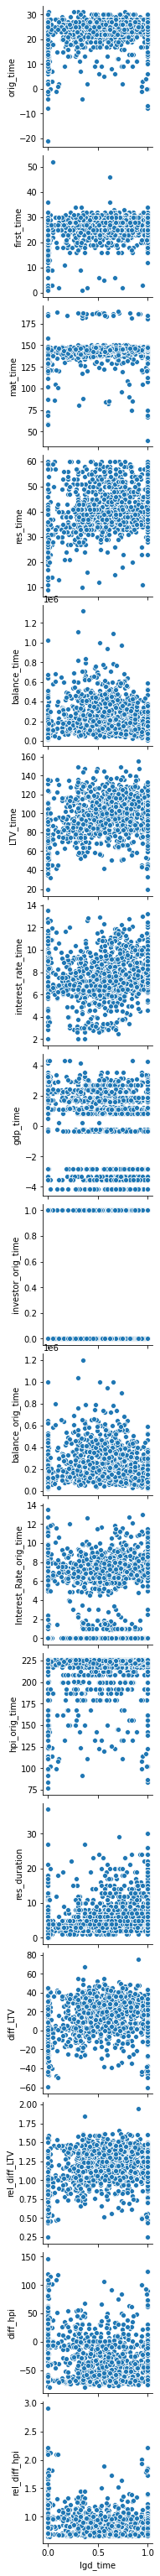

In [73]:
sns.pairplot(data_lgd_new,
             x_vars = ['lgd_time'],
             y_vars = [ 'orig_time', 'first_time', 'mat_time', 'res_time', 'balance_time', 'LTV_time', 'interest_rate_time', 'gdp_time', 'investor_orig_time', 'balance_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time', 'res_duration', 'diff_LTV', 'rel_diff_LTV', 'diff_hpi', 'rel_diff_hpi'],
             
            )
plt.show()

In [74]:
#Splitten in Trainings- und Testset (bei timestamp 45)
lgd_train = data_lgd_new[data_lgd_new['time'] < 45]
lgd_test = data_lgd_new[data_lgd_new['time'] >= 45]

In [75]:
#Die Variable time wird entfert und der Datensatz wird in train und test gesplittet.
#Da der Train- Testsplit anhand von Zeitperioden erolgt, wird die Zeitperiode nicht mehr als Feature aufgenommen. 
data_less_time_train = lgd_train.loc[:, lgd_train.columns != 'time']
data_less_time_test = lgd_test.loc[:, lgd_test.columns != 'time']

#Erstellen von y_train, x_train
y_train = data_less_time_train['lgd_time']
x_train = data_less_time_train.loc[:, data_less_time_train.columns != 'lgd_time']

#Erstellen von y_test, x_test
y_test = data_less_time_test['lgd_time']
x_test = data_less_time_test.loc[:, data_less_time_test.columns != 'lgd_time']


In [76]:
#Importieren des StandardScalers
from sklearn.preprocessing import StandardScaler

#Standardisieren der features
scaler = StandardScaler()

#Nur das Trainingsset fitten
scaler.fit(x_train)

#Transformieren von Trainings- und Testset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Um die Performance der späteren PCA zu verbessern, werden die Features zentriert und normalisiert. Dimensionsverringerungsalgorithmen wie die PCA können zu einer besseren Performance des Modells beitragen, indem die Schätzvarianz verringert wird und der 'Curse of dimensions' abgeschwächt wird. Die PCA wird auf alle Features angewendet. Wir behalten die Anzahl der PCAs, welche 90% der Variation der Features erklären.


Ein Vorteil der PCA ist es, dass die Komplexität von Datensätzen mit vielen Datenfeatures reduziert werden kann, ohne den Großteil des Informationgehahlts zu verlieren. 

In [77]:
from sklearn.decomposition import PCA 
#Ausgeben der principle components, sodass 90% der varianz erhalten bleiben 
pca = PCA(.90)

Anzahl benötigter principal Components
----------------------------------------
34


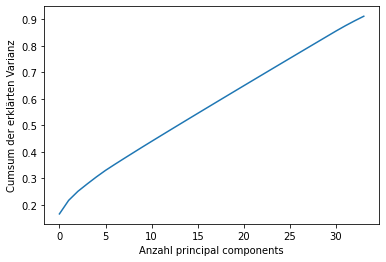

In [118]:
#Fit der PCA auf das Trainingsset
pca.fit(x_train_scaled)

#Plot der kumulativen Summe der erklärten Varianz
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl principal components')
plt.ylabel('Cumsum der erklärten Varianz')

#Anzahl benötigter Komponenten
print('Anzahl benötigter principal Components')
print('-'*40)
print(pca.n_components_)

In der oberen Grafik ist ersichtlich, dass es keine principle Component gibt, die einen besonders hohen Erklärwert haben. Dies sieht man insbesondere an der nahezu linear verlaufenden Kurve. 

In [79]:
#Transformieren von Trainings- und Testset
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [80]:
#Schaffen der neuen Datensätze 
PCA_train = pd.DataFrame(data=x_train_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27','principle_component28','principle_component29','principle_component30','principle_component31','principle_component32','principle_component33','principle_component34'])
PCA_test = pd.DataFrame(data=x_test_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27','principle_component28','principle_component29','principle_component30','principle_component31','principle_component32','principle_component33','principle_component34'])

In [81]:
PCA_train

,principle_component1,principle_component2,principle_component3,principle_component4,principle_component5,principle_component6,principle_component7,principle_component8,principle_component9,principle_component10,...,principle_component25,principle_component26,principle_component27,principle_component28,principle_component29,principle_component30,principle_component31,principle_component32,principle_component33,principle_component34
0,0.324542,-0.248429,0.850161,-0.704038,-1.232950,0.171974,1.579493,0.720400,0.633101,-0.397872,...,-0.012879,0.021779,-0.005409,0.002565,0.006821,0.017063,-0.024071,0.695142,0.025552,0.722011
1,-0.791508,-1.537479,1.205096,-0.965850,-0.808711,-0.010228,1.502756,0.633852,0.709959,-0.366963,...,-0.013393,0.024511,-0.010106,-0.000757,0.008954,0.012266,-0.020448,0.478872,0.115985,0.820663
2,-0.654136,-1.460415,4.845767,-1.450413,-0.243832,0.460176,1.256173,0.336292,0.496035,-0.222880,...,-0.035826,0.009739,-0.016387,-0.009286,0.011591,-0.002899,-0.029281,0.159901,-0.222943,-0.612832
3,-1.623254,-1.602642,-0.469094,-0.757362,-0.026382,-0.445172,-1.248446,0.617838,1.333820,1.808961,...,0.092333,0.498536,0.558910,-0.587210,-0.449532,0.063547,-0.009026,0.225038,1.558510,0.452007
4,-0.738111,-2.232023,-1.410604,-1.185293,1.489084,-0.642254,-0.955543,0.275538,-0.283854,-2.031075,...,-0.110264,-0.097868,-0.108852,0.147316,-0.077530,-0.081107,-0.133450,-0.446435,-1.544266,0.653081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.090784,2.909640,-0.240452,-0.437307,-0.671204,-0.476442,-0.191441,-0.599903,0.062409,-0.528022,...,-0.022125,-0.012000,0.004233,-0.030731,-0.025937,0.022037,0.009933,0.403874,0.227359,-0.524936
1000,-0.034409,-1.106247,1.067212,-0.385791,-2.332125,1.372483,0.705547,0.299842,0.827919,-0.975457,...,-0.026699,0.009343,-0.025449,-0.011708,-0.003340,0.018619,-0.013399,0.839199,0.558412,-0.697594
1001,-1.144541,1.234356,0.655587,-0.752049,-1.541123,-0.038293,0.961294,1.130936,0.971151,-0.634187,...,-0.009740,-0.032649,-0.028024,0.021700,0.016964,0.009644,-0.020538,0.969215,0.045460,0.946561
1002,-2.415180,0.533063,2.649292,-0.539037,1.046637,-0.220865,0.172768,-0.968386,-0.287831,-0.279753,...,-0.029335,0.015464,-0.012919,-0.066334,-0.050726,-0.009613,0.004559,-0.516481,-0.171581,-1.248469


In [82]:
PCA_test

,principle_component1,principle_component2,principle_component3,principle_component4,principle_component5,principle_component6,principle_component7,principle_component8,principle_component9,principle_component10,...,principle_component25,principle_component26,principle_component27,principle_component28,principle_component29,principle_component30,principle_component31,principle_component32,principle_component33,principle_component34
0,-1.917854,-1.834022,-0.868739,-0.224626,-0.529655,-0.745045,-0.762886,-0.420821,-0.077282,-1.651222,...,-0.101994,-0.140777,-0.113918,0.106945,-0.092186,-0.099341,-0.138179,-0.580141,-1.256123,-0.618766
1,-1.857323,-1.622067,-0.992021,-0.958162,1.140132,-0.245822,1.358509,-0.805726,1.309218,0.443082,...,-0.409318,-1.834263,-0.533858,0.216431,-0.111160,-0.175976,-0.084429,-0.160410,-0.472420,-1.403903
2,-2.215199,0.465736,-0.159217,1.627906,-1.431926,0.527571,-0.508531,0.962848,-0.639333,1.805567,...,-0.090790,-0.176498,-0.198344,-0.298995,-0.045131,-0.001919,-0.037173,0.392530,0.014269,-1.138245
3,-1.985544,-2.147716,-0.813403,-1.135494,-0.241141,-0.657005,-0.806538,-0.389331,0.027027,-1.629916,...,-0.104952,-0.140941,-0.118567,0.091273,-0.073975,-0.100214,-0.141854,-0.496805,-0.938997,-0.467607
4,-1.051349,0.171838,1.403208,1.404054,0.861443,2.507930,-0.407851,-0.714631,0.142480,-0.695816,...,0.407787,-0.339418,0.141588,-0.059140,-0.136726,-0.006494,0.265753,-0.825670,0.706991,0.366219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-2.141763,1.833888,0.374159,0.750483,-1.776819,0.662698,-1.361411,1.255642,-0.626499,-0.141319,...,-0.199063,-0.274454,-0.207699,-0.144529,-0.008673,-0.013216,-0.160366,0.687666,-1.127250,-1.980827
104,0.298630,-1.065133,2.614383,-1.465654,0.687306,-1.149157,-2.539793,-0.935538,1.652288,3.059202,...,-2.048803,-0.684414,-1.206798,3.253238,4.623855,-2.571283,-1.554999,5.378225,3.479780,-1.294881
105,-1.705066,0.483248,1.266585,1.068869,0.892410,2.151111,-0.950576,-0.383220,0.516479,-0.938877,...,0.411984,-0.378967,0.127787,-0.040842,-0.135854,-0.013999,0.278108,-0.601391,0.760737,0.726915
106,-3.560232,-1.326106,-0.870476,0.677797,-1.264818,1.650895,0.799962,-2.055000,-1.704862,1.911242,...,-0.106542,-0.238434,-0.105570,-0.038830,-0.109413,-0.024954,-0.004201,0.213192,0.354779,-1.442184


In [83]:
#Importieren der Hyperparameter für die Decision Tree Modelle
%store -r dt_pca_params
%store -r dt_scaled_params
%store -r dt_base_params

In [119]:
#später löschen
#dt_pca_params = dict(dt_pca_params)
#dt_scaled_params = dict(dt_scaled_params)
#dt_base_params = dict(dt_scaled_params)

In [120]:
#Transfomieren der Dictionaries in pandas Dataframe 
dt_pca_df = pd.DataFrame(list(dt_pca_params.items()),columns = ['hyperparameters','values'])
dt_scaled_df = pd.DataFrame(list(dt_scaled_params.items()),columns = ['hyperparameters','values'])
dt_base_df = pd.DataFrame(list(dt_base_params.items()),columns = ['hyperparameters','values'])

In [86]:
#Ausgeben der Hyperparameter für die Decision Tree Modelle
print(dt_pca_df)
print('-'*40)
print(dt_scaled_df)
print('-'*40)
print(dt_base_df)

         hyperparameters   values
0              max_depth   4.0000
1           max_features  18.0000
2  min_impurity_decrease   0.0001
3       min_samples_leaf  16.0000
4      min_samples_split  58.0000
----------------------------------------
         hyperparameters   values
0              max_depth   4.0000
1           max_features  11.0000
2  min_impurity_decrease   0.0001
3       min_samples_leaf  23.0000
4      min_samples_split  46.0000
----------------------------------------
         hyperparameters   values
0              max_depth   4.0000
1           max_features  11.0000
2  min_impurity_decrease   0.0001
3       min_samples_leaf  23.0000
4      min_samples_split  46.0000


In [87]:
#Importieren der Hyperparameter für die Random Forest Modelle
%store -r rf_pca_params
%store -r rf_scaled_params
%store -r rf_base_params

In [88]:
#löschen
#rf_pca_params = dict(rf_pca_params)
#rf_scaled_params = dict(rf_scaled_params)
#rf_base_params = dict(rf_scaled_params)

In [89]:
#Transfomieren der Dictionaries in pandas Dataframe 
rf_pca_df = pd.DataFrame(list(rf_pca_params.items()),columns = ['hyperparameters','values'])
rf_scaled_df = pd.DataFrame(list(rf_scaled_params.items()),columns = ['hyperparameters','values'])
rf_base_df = pd.DataFrame(list(rf_base_params.items()),columns = ['hyperparameters','values'])

In [90]:
#Ausgeben der Hyperparameter für die Ensemble Methode (Random Forest)
print(rf_pca_df)
print('-'*40)
print(rf_scaled_df)
print('-'*40)
print(rf_base_df)

     hyperparameters  values
0          max_depth      30
1       max_features      21
2  min_samples_split       2
3       n_estimators     907
----------------------------------------
     hyperparameters  values
0          max_depth      10
1       max_features      26
2  min_samples_split      15
3       n_estimators     443
----------------------------------------
     hyperparameters  values
0          max_depth      10
1       max_features      26
2  min_samples_split      15
3       n_estimators     443


In [91]:
#Importieren der Hyperparameter für die Gradient Boosting Modelle
%store -r gbr_pca_params
%store -r gbr_scaled_params
%store -r gbr_base_params

In [92]:
#gbr_pca_params = dict(gbr_pca_params)
#gbr_scaled_params = dict(gbr_scaled_params)
#gbr_base_params = dict(gbr_scaled_params)

In [93]:
#Transfomieren der Dictionaries in pandas Dataframe 
gbr_pca_df = pd.DataFrame(list(gbr_pca_params.items()),columns = ['hyperparameters','values'])
gbr_scaled_df = pd.DataFrame(list(gbr_scaled_params.items()),columns = ['hyperparameters','values'])
gbr_base_df = pd.DataFrame(list(gbr_base_params.items()),columns = ['hyperparameters','values'])

In [94]:
#Ausgeben der Hyperparameter für die Gradient Boosting Verfahren
print(gbr_pca_df)
print('-'*40)
print(gbr_scaled_df)
print('-'*40)
print(gbr_base_df)

  hyperparameters   values
0   learning_rate     0.01
1       max_depth     5.00
2    n_estimators  1078.00
3       subsample     0.50
----------------------------------------
  hyperparameters   values
0   learning_rate     0.01
1       max_depth    10.00
2    n_estimators  1087.00
3       subsample     0.50
----------------------------------------
  hyperparameters   values
0   learning_rate     0.01
1       max_depth    10.00
2    n_estimators  1087.00
3       subsample     0.50


<h2>Decision Tree</h2>
<p><br />Ein Decision Tree ist ein Regressions und Klassifikationsalgorithmus, welcher anhand festgelegten Entscheidungsregeln die Features unterteilt. Jeder Gruppierung von Features wird ein Outcome Wert zugewiesen.</p>
<p><br /><span style="color: #008000;">Vorteile:</span><br />-Einfach zu interpretieren: Erm&ouml;glicht die Visiualisierung der Entscheidungsregeln anhand von B&auml;umen, daher gute Nachvollziehabkeit<br />-Ben&ouml;tigt keine Annahmen &uuml;ber die zugrunde liegende Verteilung der Features</span><br />-Kann gut mit numerischen als auch kategorischen Features umgehen-Flexibel einsetzbar f&uuml;r Klassifikations- und Regressionsprobleme<br />-Komplexe Zusammenh&auml;nge in Trainingsdaten werden erlernt</p>
<p><br /><span style="color: #ff0000;">Nachteile:</span><br />-Overfitting kann sehr einfach auftreten, wenn nicht beachtet-Bei geringen Abweichungen in den </span><br />-Bei geringen Abweichungen in den Daten kann es zu sehr unterschiedlichen Ergebnissen kommen</p>

In [95]:
#Decision Tree mit PCA
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.tree import DecisionTreeRegressor 

#Erstellen des Modells
dtr1 = DecisionTreeRegressor(max_depth = dt_pca_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_pca_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_pca_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_pca_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_pca_df.iloc[4,1].astype(np.int64))
#Fitten des Modells
dtr = dtr1.fit(x_train_pca, y_train)

#Schätzen der target variable in sample und out of sample
y_dt_pca_is = dtr1.predict(x_train_pca)
y_dt_pca_os = dtr1.predict(x_test_pca)

#MAE berechnen 
mae_dt_pca = MAE(y_test, y_dt_pca_os)

#MSE berechnen 
mse_dt_pca = MSE(y_test, y_dt_pca_os)

#RMSE berechnen 
rmse_dt_pca = mse_dt_pca**(1/2)

#MSE/RMSE
print('MAE decision tree PCA\n:', mae_dt_pca)
print('-'*45)
print('MSE decision tree PCA\n:', mse_dt_pca)
print('-'*45)
print('RMSE decision tree PCA\n:', rmse_dt_pca)


MAE decision tree PCA
: 0.25046287506444154
---------------------------------------------
MSE decision tree PCA
: 0.10451466949040383
---------------------------------------------
RMSE decision tree PCA
: 0.3232872863111134


<p>Im Vergleich zu anderen angewandten Verfahren hat hier die PCA eher schlecht abgeschnitten. Das liegt unter anderen daran, dass der Informationsgehalt durch die Feature Reduktion teilweise verloren geht.</p>
<p>Die Reduzierung der Features kann bei gro&szlig;en Datens&auml;tzen Vorteile haben. Da hier die Anzal der Features noch &uuml;berschaubar ist, hat eine Rezuierung der Features eher Nachteile, da der Informationsgehalt gek&uuml;rzt wird. <br />Au&szlig;erdem wird die Interpretierbarkeit der machine learning Algorthmen noch weiter erschwert. </p>

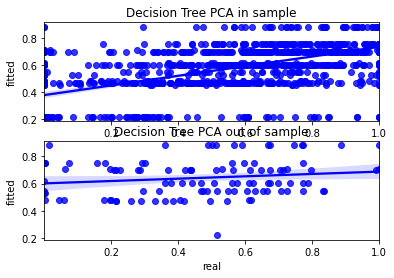

In [96]:
plt.subplot(211)
sns.regplot(y_train, y_dt_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree PCA out of sample')


plt.show()

In [97]:
#Decision Tree mit skalierten features
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor 

dtr2 = DecisionTreeRegressor(max_depth = dt_scaled_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_scaled_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_scaled_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_scaled_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_scaled_df.iloc[4,1].astype(np.int64))

dtr2.fit(x_train_scaled, y_train)


y_dt_scaled_is = dtr2.predict(x_train_scaled)
y_dt_scaled_os = dtr2.predict(x_test_scaled)

#MAE berechnen 
mae_dt_sc = MAE(y_test, y_dt_scaled_os)

#MSE berechnen 
mse_dt_sc = MSE(y_test, y_dt_scaled_os)

#RMSE berechnen 
rmse_dt_sc = mse_dt_sc**(1/2)

#MSE/RMSE

print('MAE decision tree scaled\n:', mae_dt_sc)
print('-'*45)
print('MSE decision tree scaled\n:', mse_dt_sc)
print('-'*45)
print('RMSE decision tree scaled\n:', rmse_dt_sc)

MAE decision tree scaled
: 0.2511394182383782
---------------------------------------------
MSE decision tree scaled
: 0.10280172447191997
---------------------------------------------
RMSE decision tree scaled
: 0.3206270800664223


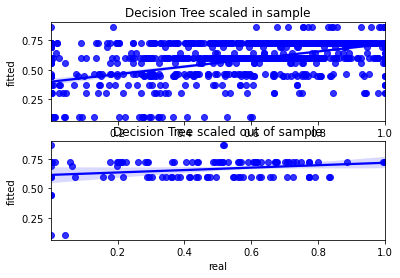

In [98]:
plt.subplot(211)
sns.regplot(y_train, y_dt_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree scaled out of sample')


plt.show()

In [99]:
#Decision Tree mit base features
#Importieren notwendiger Libraries für eine Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

dtr3 = DecisionTreeRegressor(max_depth = dt_base_df.iloc[0, 1].astype(np.int64),
                             max_features = dt_base_df.iloc[1,1].astype(np.int64),
                             min_impurity_decrease = dt_base_df.iloc[2,1].astype(np.float64),
                             min_samples_leaf = dt_base_df.iloc[3,1].astype(np.int64),
                             min_samples_split = dt_base_df.iloc[4,1].astype(np.int64))

dtr3.fit(x_train, y_train)

y_dt_base_is = dtr3.predict(x_train)
y_dt_base_os = dtr3.predict(x_test)

#MAE berechnen
mae_dt_base = MAE(y_test, y_dt_base_os)
#MSE berechnen 
mse_dt_base = MSE(y_test, y_dt_base_os)

#RMSE berechnen 
rmse_dt_base = mse_dt_base**(1/2)

#MSE/RMSE
print('MAE decision tree base\n:', mae_dt_base)
print('-'*45)
print('MSE decision tree base\n:', mse_dt_base)
print('-'*45)
print('RMSE decision tree base\n:', rmse_dt_base)

MAE decision tree base
: 0.24102350114354676
---------------------------------------------
MSE decision tree base
: 0.0916441911248578
---------------------------------------------
RMSE decision tree base
: 0.30272791599860394


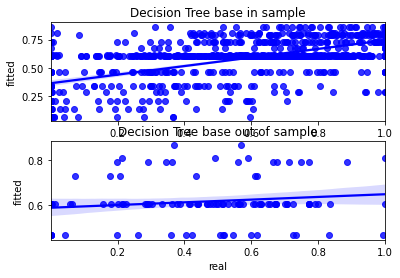

In [100]:
plt.subplot(211)
sns.regplot(y_train, y_dt_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree base in sample')

plt.subplot(212)
sns.regplot(y_test, y_dt_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Decision Tree base out of sample')


plt.show()

<h2>Random Forest</h2>
<p><br />Ein Random Forest ist eine Ensemble Methode f&uuml;r Decision Trees. Es ist ein sogenanntes supervised Verfahren, das aus mehreren unkorrelierten Entscheidungsb&auml;umen besteht, die eine Vorhersage liefern. Das Ergenis der Sch&auml;tzung ist der Mittelwert der Sch&auml;tzungen der einzelnen unabh&auml;ngigen Decision Trees. Die Features, die jedem einzelnen Tree zu Verf&uuml;gung stehen, werden zuf&auml;llig gezogen. Au&szlig;erdem werden die einzelnen Trees nicht auf den gleichen, sonder auf gebootstrappten Samples antrainiert.</p>
<p><br /><span style="color: #008000;">Vorteile:</span></p>
<p>-Random Forest bietet eine Verbesserung der Konsistenz bzw. Verringerung der Varianz im Vergleich zu konventionellen Decision Trees und insbesondere im Vergleich zu Einzelentscheidungsb&auml;umen<br />-Random Forests sind robust gegen&uuml;ber Ausrei&szlig;ern.<br />-Das Risiko f&uuml;r Overfitting wird verringert<br /><br /><span style="color: #ff0000;">Nachteile:</span></p>
<p>-Sie sind schwer zu interpretieren<br />-K&ouml;nnen bei gro&szlig;en Datenmengen sehr rechenintensiv sein</p>

In [101]:
#Random Forest mit PCA
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor(max_depth = rf_pca_df.iloc[0,1],
                             max_features = rf_pca_df.iloc[1,1],
                             min_samples_split = rf_pca_df.iloc[2,1],
                             n_estimators = rf_pca_df.iloc[3,1] )

rfr1.fit(x_train_pca, y_train)

y_rf_pca_is = rfr1.predict(x_train_pca)
y_rf_pca_os = rfr1.predict(x_test_pca)

#MAE berechnen
mae_rf_pca = MAE(y_test, y_rf_pca_os)

#MSE berechnen
mse_rf_pca = MSE(y_test, y_rf_pca_os)

#RMSE berechnen 
rmse_rf_pca = mse_rf_pca**(1/2)

#MSE/RMSE ausgeben

print('MAE Random Forest PCA\n:', mae_rf_pca)
print('-'*45)
print('MSE Random Forest PCA\n:', mse_rf_pca)
print('-'*45)
print('RMSE Random Forest PCA\n:', rmse_rf_pca)

MAE Random Forest PCA
: 0.22920891503957888
---------------------------------------------
MSE Random Forest PCA
: 0.08992143428857827
---------------------------------------------
RMSE Random Forest PCA
: 0.29986902855843295


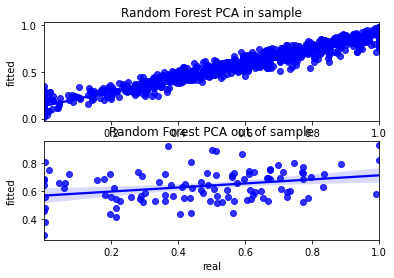

In [102]:
plt.subplot(211)
sns.regplot(y_train, y_rf_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest PCA out of sample')


plt.show()

In [103]:
#Random Forest mit skalierten features 
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

#Hier Hyperparameter eintragen
rfr2 = RandomForestRegressor(max_depth = ,
                             max_features = ,
                             min_samples_split = ,
                             n_estimators = )

rfr2.fit(x_train_scaled, y_train)

y_rf_scaled_is = rfr2.predict(x_train_scaled)
y_rf_scaled_os = rfr2.predict(x_test_scaled)

#MAE berechnen
mae_rf_sc = MAE(y_test, y_rf_scaled_os)

#MSE berechnen
mse_rf_sc = MSE(y_test, y_rf_scaled_os)

#RMSE berechnen 
rmse_rf_sc = mse_rf_sc**(1/2)

#MSE/RMSE/MAE ausgeben
print('MAE Random Forest scaled\n:', mae_rf_sc)
print('-'*45)
print('MSE Random Forest scaled\n:', mse_rf_sc)
print('-'*45)
print('RMSE Random Forest scaled\n:', rmse_rf_sc)

MAE Random Forest scaled
: 0.20279187750866837
---------------------------------------------
MSE Random Forest scaled
: 0.07019693296620724
---------------------------------------------
RMSE Random Forest scaled
: 0.2649470380400718


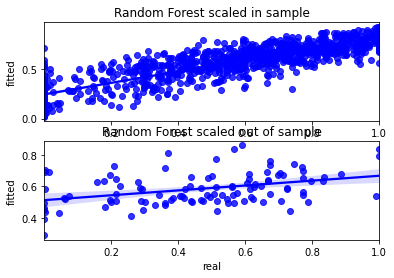

In [104]:
plt.subplot(211)
sns.regplot(y_train, y_rf_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest scaled out of sample')


plt.show()

In [105]:
#Random Forest mit base features 
#Importieren notwendiger libraries
from sklearn.ensemble import RandomForestRegressor

#Hier Hyperparameter eintragen
rfr3 = RandomForestRegressor(max_depth = ,
                             max_features = ,
                             min_samples_split = ,
                             n_estimators = )

rfr3.fit(x_train, y_train)

y_rf_base_is = rfr3.predict(x_train)
y_rf_base_os = rfr3.predict(x_test)

#MAE berechnen
mae_rf_base = MAE(y_test, y_rf_base_os)

#MSE berechnen
mse_rf_base = MSE(y_test, y_rf_base_os)

#RMSE berechnen 
rmse_rf_base = mse_rf_base**(1/2)

#MSE/RMSE/MAE ausgeben
print('MAE Random Forest base\n:', mae_rf_base)
print('-'*45)
print('MSE Random Forest base\n:', mse_rf_base)
print('-'*45)
print('RMSE Random Forest base\n:', rmse_rf_base)

MAE Random Forest base
: 0.2048069475418235
---------------------------------------------
MSE Random Forest base
: 0.07235152289444051
---------------------------------------------
RMSE Random Forest base
: 0.26898238398534674


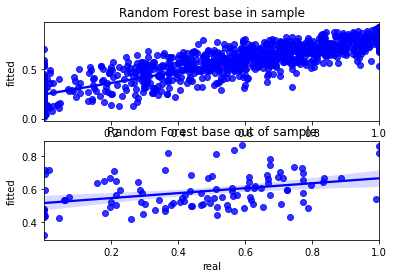

In [106]:
plt.subplot(211)
sns.regplot(y_train, y_rf_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest base in sample')

plt.subplot(212)
sns.regplot(y_test, y_rf_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Random Forest base out of sample')


plt.show()

<h2>Gradient Boosting</h2>
<p><br />Gradient Boosting ist eine weitere Ensemble Methode f&uuml;r Decision Trees, welche viele einzelne Trees sequentiell trainiert. Die Fehler eines Modells werden im folgenden Modell st&auml;rker gewichtet. Jeder einzelne Tree wird anhand eines gebootstrappten Samples gefittet. Nachfolgende Trees sch&auml;tzen die Residuen der jeweils Vorhergehenden.</p>
<p><br /><span style="color: #008000;">Vorteile:</span></p>
<p>-Verringert Verzerrung und erh&ouml;ht Konsistenz <br />-Performance des Modells kann signifikant verbessert werden <br /><br /><span style="color: #ff0000;">Nachteile:</span></p>
<p>-Optimierung der Hyperparameter in der Regel sehr rechenintensiv<br />-Sequentielles Training des Modells erlaubt keine Parallelisierung, daher hohe Laufzeiten<br />-Overfitting der Trainingsdatens&auml;tze m&ouml;glich</p>

In [107]:
#Gradient Boosted Tree mit PCA Daten
#Importieren notwendiger libraries
from sklearn.ensemble import GradientBoostingRegressor

#Hier Hyperparameter eintragen
gbr1 = GradientBoostingRegressor(learning_rate = ,
                                 max_depth = ,
                                 n_estimators = ,
                                 subsample = ,
                                 max_features = ,
                                 min_samples_split = ,
                                 min_samples_leaf = )





'


gbr1.fit(x_train_pca, y_train)

#Schätzen der y-Werte, auf Basis der Daten der PCA, mit GradientBoostingRegressor nach Hyperparameter Tuning
y_gbr_pca_is = gbr1.predict(x_train_pca)
y_gbr_pca_os = gbr1.predict(x_test_pca)

#MAE berechnen
mae_gbr_pca = MAE(y_test, y_gbr_pca_os)

#MSE berechnen 
mse_gbr_pca = MSE(y_test, y_gbr_pca_os)

#RMSE berechnen
rmse_gbr_pca = mse_gbr_pca**(1/2)

# Out of sample MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree PCA:\n', mae_gbr_pca)
print('-'*45)
print('MSE Gradient Boosted Tree PCA:\n', mse_gbr_pca)
print('-'*45)
print('RMSE Gradient Boosted Tree PCA:\n', rmse_gbr_pca)

MAE Gradient Boosted Tree PCA:
 0.23860155235295047
---------------------------------------------
MSE Gradient Boosted Tree PCA:
 0.09495699217811951
---------------------------------------------
RMSE Gradient Boosted Tree PCA:
 0.3081509243505843


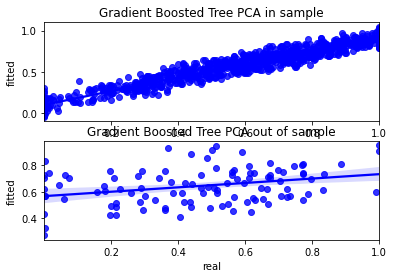

In [108]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_pca_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree PCA in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_pca_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree PCA out of sample')


plt.show()

In [109]:
#Schätzen der y-Werte, mit den, durch den StandardScaler transformierten Daten, durch GradientBoostingRegressor nach Hyperparameter Tuning
gbr2 = GradientBoostingRegressor(learning_rate = gbr_scaled_df.iloc[0,1].astype(np.float64),
                                 max_depth = gbr_scaled_df.iloc[1,1].astype(np.int64),
                                 n_estimators = gbr_scaled_df.iloc[2,1].astype(np.int64),
                                 subsample = gbr_scaled_df.iloc[3,1].astype(np.float64))

gbr2.fit(x_train_scaled, y_train)

y_gbr_scaled_is = gbr2.predict(x_train_scaled)
y_gbr_scaled_os = gbr2.predict(x_test_scaled)

#MAE berechnen
mae_gbr_sc = MAE(y_test, y_gbr_scaled_os)

#MSE berechnen 
mse_gbr_sc = MSE(y_test, y_gbr_scaled_os)

#RMSE berechnen
rmse_gbr_sc = mse_gbr_sc**(1/2)

#MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree scaled:\n', mae_gbr_sc)
print('-'*45)
print('MSE Gradient Boosted Tree scaled:\n', mse_gbr_sc)
print('-'*45)
print('RMSE Gradient Boosted Tree scaled:\n', rmse_gbr_sc)

MAE Gradient Boosted Tree scaled:
 0.1990346857842861
---------------------------------------------
MSE Gradient Boosted Tree scaled:
 0.06365162293832305
---------------------------------------------
RMSE Gradient Boosted Tree scaled:
 0.2522927326308133


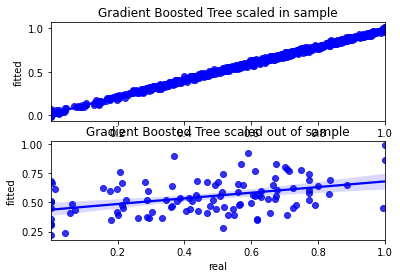

In [110]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_scaled_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree scaled in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_scaled_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree scaled out of sample')


plt.show()

In [111]:
#Schätzen der y-Werte, mit den normalen Daten, durch GradientBoostingRegressor nach Hyperparameter Tuning
gbr3 = GradientBoostingRegressor(learning_rate = gbr_base_df.iloc[0,1].astype(np.float64),
                                 max_depth = gbr_base_df.iloc[1,1].astype(np.int64),
                                 n_estimators = gbr_base_df.iloc[2,1].astype(np.int64),
                                 subsample = gbr_base_df.iloc[3,1].astype(np.float64))

gbr3.fit(x_train, y_train)

y_gbr_base_is = gbr3.predict(x_train)
y_gbr_base_os = gbr3.predict(x_test)

#MAE berechnen
mae_gbr_base = MAE(y_test, y_gbr_base_os)

#MSE berechnen 
mse_gbr_base = MSE(y_test, y_gbr_base_os)

#RMSE berechnen
rmse_gbr_base = mse_gbr_base**(1/2)

#MAE/MSE/RMSE ausgeben 
print('MAE Gradient Boosted Tree base:\n', mae_gbr_base)
print('-'*45)
print('MSE Gradient Boosted Tree base:\n', mse_gbr_base)
print('-'*45)
print('RMSE Gradient Boosted Tree base:\n', rmse_gbr_base)

MAE Gradient Boosted Tree base:
 0.20187711672586314
---------------------------------------------
MSE Gradient Boosted Tree base:
 0.06559275746396517
---------------------------------------------
RMSE Gradient Boosted Tree base:
 0.25611083043082183


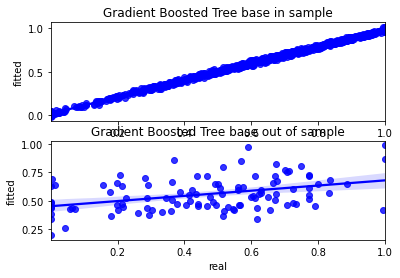

In [112]:
plt.subplot(211)
sns.regplot(y_train, y_gbr_base_is, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree base in sample')

plt.subplot(212)
sns.regplot(y_test, y_gbr_base_os, color='blue')
plt.xlabel('real')
plt.ylabel('fitted')
plt.title('Gradient Boosted Tree base out of sample')


plt.show()

Laut unserer Modellierung, zeigt der ... Algorithmus, angewendet auf ..., die beste Performance. Die Out-of-Sample Modellselektionskriterien betragen:
-MSE:
-RMSE:
-MAE:

Generell liefern Schätzungen für die standardskalierten und nicht-skalierten Datenstätze fast identische Performancekennzahlen. Der Datensatz, auf welchen wir zur Feature-Reduktion die PCA angewendet haben, zeigt signifikant schlechtere Werte. Das kann mittels der verringerten Feature-Variation, ein Ergebnis der Dimensionsreduktion, erklärt werden. Die Verringerung der Schätzvarianz kann die Reduktion der Variation in den Features nicht kompensieren und das Modell performt schlussendlich schlechter. Dieser Nachteil der PCA könnte verhindert werden, indem wir die PCA nur auf eine bestimmte Menge der Features anwenden. Da wir aber kein Feature identifizieren können, welches individuell einen Großteil der Variation im Outcome erklärt und somit von der PCA ausgeschlossen werden könnte, ist ein Erfolg dieses Ansatzes nicht zu erwarten.

Für allgemeine Informationen zur Analyse stützten wir uns auf:
</span><br />Hurlin, Christophe; Leymarie, Jérémy; Patin, Antoine (2018). Loss functions for Loss Given Default model comparison. European Journal of Operational Research, (), S0377221718300389–. doi:10.1016/j.ejor.2018.01.020 

</span><br />Papouskova, Monika; Hajek, Petr (2019). Two-stage consumer credit risk modelling using heterogeneous ensemble learning. Decision Support Systems, 118(), 33–45. doi:10.1016/j.dss.2019.01.002 

</span><br />Tanoue, Y., Yamashita, S. & Nagahata, H. Comparison study of two-step LGD estimation model with probability machines. Risk Manag 22, 155–177 (2020). https://doi.org/10.1057/s41283-020-00059-y

</span><br />Munkhdalai, Lkhagvadorj; Munkhdalai, Tsendsuren; Namsrai, Oyun-Erdene; Lee, Jong; Ryu, Keun (2019). An Empirical Comparison of Machine-Learning Methods on Bank Client Credit Assessments. Sustainability, 11(3), 699–. doi:10.3390/su11030699 